<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/VietNam_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [44]:
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [45]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam MoNey/Money_data/Money_Train', target_size=(120,120), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam MoNey/Money_data/Money_Test', target_size=(120,120), class_mode='categorical')
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

Found 2233 images belonging to 11 classes.
Found 375 images belonging to 11 classes.
train_index : {'1.000': 0, '10.000': 1, '100.000': 2, '2.000': 3, '20.000': 4, '200': 5, '200.000': 6, '5.000': 7, '50.000': 8, '500': 9, '500.000': 10}
test_index: {'1.000': 0, '10.000': 1, '100.000': 2, '2.000': 3, '20.000': 4, '200': 5, '200.000': 6, '5.000': 7, '50.000': 8, '500': 9, '500.000': 10}


In [46]:
model= Sequential()
#CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(120,120,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =11

In [47]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [48]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [49]:
his=model.fit(train_data,epochs=30,batch_size=128,verbose=1,validation_data=test_data)
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

Epoch 1/30
70/70 [==============================] - 315s 4s/step - loss: 1.6539 - accuracy: 0.3627 - val_loss: 1.4215 - val_accuracy: 0.4933
Epoch 2/30
70/70 [==============================] - 7s 104ms/step - loss: 0.6048 - accuracy: 0.7609 - val_loss: 1.0665 - val_accuracy: 0.6267
Epoch 3/30
70/70 [==============================] - 7s 102ms/step - loss: 0.3393 - accuracy: 0.8706 - val_loss: 0.8309 - val_accuracy: 0.7467
Epoch 4/30
70/70 [==============================] - 8s 114ms/step - loss: 0.2272 - accuracy: 0.9104 - val_loss: 1.1786 - val_accuracy: 0.6720
Epoch 5/30
70/70 [==============================] - 7s 104ms/step - loss: 0.1657 - accuracy: 0.9355 - val_loss: 1.2509 - val_accuracy: 0.7093
Epoch 6/30
70/70 [==============================] - 8s 116ms/step - loss: 0.1403 - accuracy: 0.9458 - val_loss: 1.4649 - val_accuracy: 0.6960
Epoch 7/30
70/70 [==============================] - 8s 108ms/step - loss: 0.0885 - accuracy: 0.9695 - val_loss: 1.3886 - val_accuracy: 0.7040
Epoch 8

In [50]:
model.save('/content/drive/MyDrive/Model Save/VietNam_Money.h5')

<ipython-input-51-d88fc4a269da>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='blue')


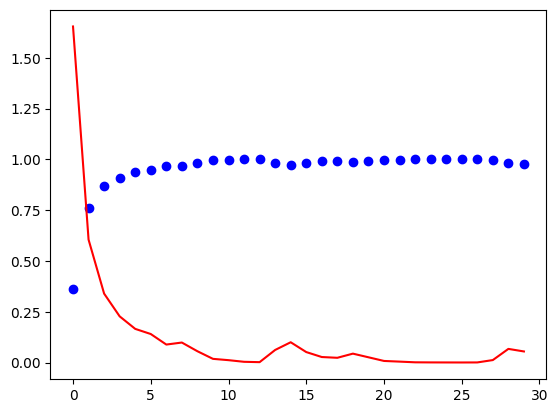

In [51]:
accuracy = his.history['accuracy']
loss = his.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='blue')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [52]:
from keras.models import load_model
# load model save
model_vietnam_money= load_model('/content/drive/MyDrive/Model Save/VietNam_Money.h5')

1/1 [==============================] - 0s 21ms/step
Loại tiền này là : 5.000


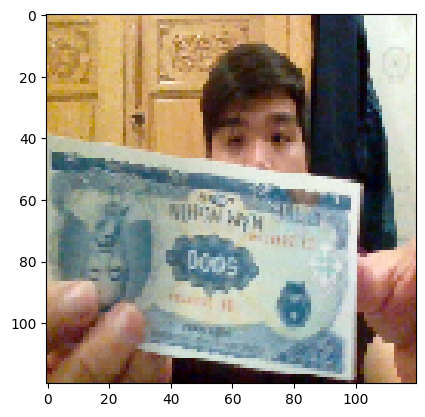

1/1 [==============================] - 0s 21ms/step
Loại tiền này là : 10.000


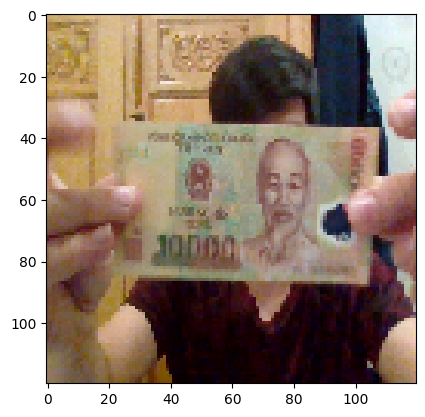

1/1 [==============================] - 0s 19ms/step
Loại tiền này là : 500.000


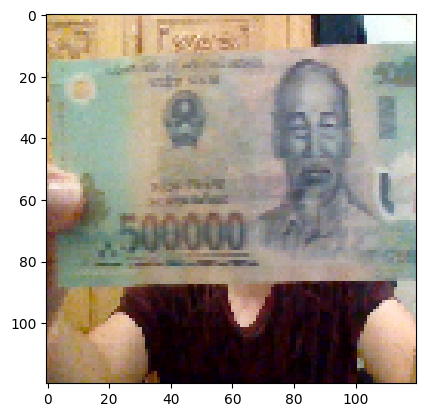

1/1 [==============================] - 0s 29ms/step
Loại tiền này là : 50.000


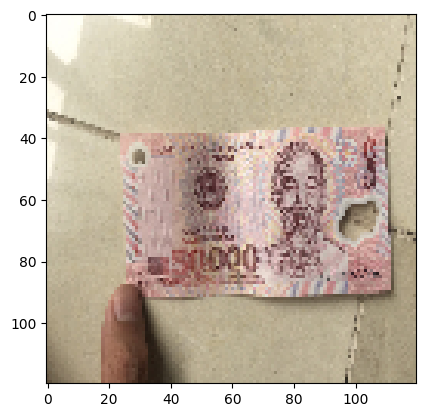

In [56]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam MoNey/Money_data/Identify_test"

# Tạo tên hiện của các loại tiền Việt Nam
name_money= ['1.000','10.000','100.000','2.000',
             '20.000','200','200.000','5.000','50.000','500','500.000']

# Quét hết các hình trong đường dẫn và tiến hành dự đoán các loại tiền
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(120,120), color_mode = 'rgb')
  plt.imshow(img)

  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_vietnam_money.predict(img).argmax())

  print("Loại tiền này là :",name_money[result])
  plt.show()